In [1]:
from src.utils.data_handler import DataHandler

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [3]:
D = DataHandler('gcdc')

# Multi Domain Data

In [4]:
domain_names = ['clinton', 'enron', 'yahoo', 'yelp']
flatten = lambda x: [i for j in x for i in j]
sns.set_theme()

def create_fig():
    fig, axs = plt.subplots(ncols=2, nrows=2)
    fig.set_figheight(8)
    fig.set_figwidth(10)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    return fig, axs

def score_dist(data, rnd=False):
    fig, axs = create_fig()
    for k, data_set in enumerate(data):
        if not rnd:
            scores = [ex.score for ex in data_set]
            sns.histplot(scores, bins=7, binrange=[2.5,9.5], ax=axs[k//2, k%2],  stat='probability')
        else:
            scores = [ex.avg_score for ex in data_set]
            sns.histplot(scores, bins=3, binrange=[-0.5,2.5], ax=axs[k//2, k%2], stat='probability')
        axs[k//2, k%2].title.set_text(domain_names[k].upper())
    plt.show()

def sent_dist(data):
    fig, axs = create_fig()
    for k, data_set in enumerate(data):
        sents = [ex.sents for ex in data_set]
        sent_lens = [len(ex) for ex in sents]     
        sns.histplot(sent_lens, binwidth=1, ax=axs[k//2, k%2], stat='probability')
        axs[k//2, k%2].title.set_text(domain_names[k].upper())
        axs[k//2, k%2].set(xlabel='sentence length')

def char_dist(data):
    fig, axs = create_fig()
    for k, data_set in enumerate(data):
        sents = [ex.sents for ex in data_set]
        char_lens = [len(flatten(ex)) for ex in sents]     
        sns.kdeplot(char_lens, ax=axs[k//2, k%2], )
        axs[k//2, k%2].title.set_text(domain_names[k].upper())
        axs[k//2, k%2].set(xlabel='character length')

def data_stats(data):    
    for k, data_set in enumerate(data):
        scores = np.array([ex.score for ex in data_set])
        mean = scores.mean()
        var = scores.var()
        print(f'{domain_names[k].upper():<10} mean:{mean:.2f}, variance:{var:.2f}')
    plt.show()

In [5]:
train_data = [D.clinton_train, D.enron_train, D.yahoo_train, D.yelp_train]
dev_data = [D.clinton_dev, D.enron_dev, D.yahoo_dev, D.yelp_dev]

# char_dist(train_data)
# sent_dist(train_data)
# score_dist(train_data)
# score_dist(train_data, rnd=True)

# Clinton Statistics

In [56]:
def score_dist(data, rnd=False):
    if not rnd:
        scores = [ex.score for ex in data]
        sns.histplot(scores, bins=7, binrange=[2.5,9.5], stat='probability')
    else:
        scores = [ex.avg_score for ex in data]
        sns.histplot(scores, bins=3, binrange=[-0.5,2.5], stat='probability')
    plt.show()

def sent_dist(data, color='r'):
    sents = [ex.sents for ex in data]
    sent_lens = [len(ex) for ex in sents] 
    sns.histplot(sent_lens, binwidth=1, alpha=0.5, color=color, stat='probability')
    #sns.kdeplot(sent_lens)
    plt.xlabel('sentence length')

def char_dist(data):
    sents = [ex.sents for ex in data]
    char_lens = [len(flatten(ex)) for ex in sents]     
    sns.kdeplot(char_lens)
    plt.xlabel('character length')


In [70]:
W = DataHandler('wiki_small')
W_u = DataHandler('wiki_unfiltered')
WSJ = DataHandler('wsj')

In [71]:
clinton = D.clinton_train
wiki_unfiltered = W_u.train
wiki_small = W.train
wsj = WSJ.train

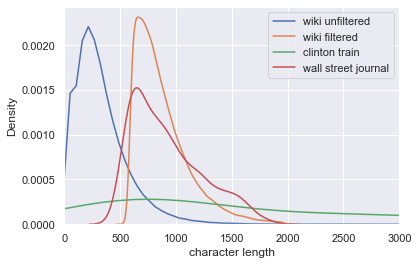

In [86]:
char_dist(wiki_unfiltered)
char_dist(wiki_small)
char_dist(wsj)
char_dist(clinton)
plt.xlim(0,3000)
plt.legend(['wiki unfiltered', 'wiki filtered', 'clinton train', 'wall street journal'])

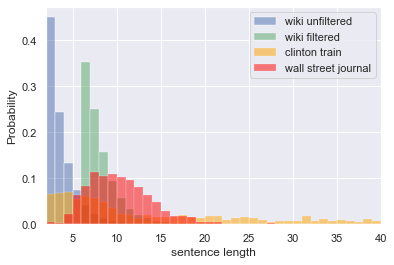

In [87]:
sent_dist(wiki_unfiltered, color='b')
sent_dist(wiki_small, color='g')
sent_dist(wsj, color='orange')
sent_dist(clinton, color='red')

plt.xlim(2,40)
plt.legend(['wiki unfiltered', 'wiki filtered', 'clinton train', 'wall street journal'])